# Alarm bell 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import my_tools as mt


df_cases_daily = mt.read_csv('cases_daily', 'daily cases')
df_cases_total = mt.read_csv('cases_total','Total cases')
df_cases_weekly = mt.read_csv('cases_weekly', 'New cases weekly')

df_deaths_daily = mt.read_csv('deaths_daily', 'daily deaths')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')
df_deaths_weekly = mt.read_csv('deaths_weekly', 'New deaths weekly')

df_prevalence = mt.read_csv('prevalence', 'Prevalence')
df_incidence_daily = mt.read_csv('incidence_daily', 'Daily incidence')
df_incidence_weekly = mt.read_csv('incidence_weekly', 'Weekly incidence')
df_mortality = mt.read_csv('mortality', 'Mortality')

df_global = mt.read_csv('global', 'Global data')

df_thresholds = pd.read_csv('../data/thresholds.csv').set_index('ind')

countries = df_cases_daily.columns
dates = df_cases_daily.index
dates_weekly = df_cases_weekly.index

latest_date = dates[-1]

In [48]:
def plot_spread(subject, countries=[], scale='lin', days=0):
    sizes = (17, 6)
    
    if days == 0:
        days = len(df_cases_daily)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    label1 = ''
    label2 = ''
    
    if subject == 'incidence':
        df1 = df_incidence_daily
        df2 = df_incidence_weekly
        
        title1 = 'Daily cases / population'
        title2 = 'Weekly cases / population'
        
        per1 = 'daily'
        per2 = 'weekly'
    elif subject == 'prevalence':
        df1 = df_prevalence
        df2 = df_mortality
        
        title1 = 'Total cases / Population'
        title2 = 'Tottal deaths / Total cases'
        
        per1 = 'weekly'
        per2 = 'weekly'
    
    if scale == 'lin':
        if countries:
            df1[countries].tail(days).plot(figsize=sizes, ax=ax1)
            df2[countries].tail(days).plot(figsize=sizes, ax=ax2, legend=False)
            ax1.legend(frameon=False, loc='upper left')
        else: 
            df1.tail(days).plot(figsize=sizes, ax=ax1, legend=False)
            df2.tail(days).plot(figsize=sizes, ax=ax2, legend=False)   
            
    elif scale == 'log':
        label1 = 'Days since 100 cases'
        label2 = 'Days since 10 deaths'
        
        df1 = mt.threshold_data(df1, 'cases', per1)
        df2 = mt.threshold_data(df2, 'deaths', per2)
        
        if countries:
            df1[countries].dropna(axis=0, how='all').plot(figsize=sizes, ax=ax1, legend=False)
            df2[countries].dropna(axis=0, how='all').plot(figsize=sizes, ax=ax2)
            ax2.legend(frameon=False, loc='lower right')
        else: 
            df1.tail(days).plot(figsize=sizes, ax=ax1, legend=False)
            df2.tail(days).plot(figsize=sizes, ax=ax2, legend=False)
        
        ax1.set_yscale('log')
        ax2.set_yscale('log')
            
    ax1.set_title(title1)
    ax1.set_xlabel(label1)
    ax2.set_title(title2)
    ax2.set_xlabel(label2)

    plt.show()
    
def plot_trends(countries=[], log=True, glob=True, subject='spread'):
    plt.figure(figsize=(17,9))
    leg = True
    
    if subject == 'impact':
        x = 'prevalence'
        y = 'incidence_weekly'
    elif subject == 'spread':
        x = 'cases_total'
        y = 'cases_weekly'
    
    df_x = eval('df_' + x)
    df_y = eval('df_' + y)
    
    df_x = mt.threshold_data(df_x, 'cases', 'weekly')
    df_y = mt.threshold_data(df_y, 'cases', 'weekly')
    
    if countries == []:
        countries = df_prevelance.columns
        leg = False
    
    for country in countries:
        if leg:
            plt.plot(df_x[country], df_y[country], label=country)
        else:
            plt.plot(df_x[country], df_y[country])
            
    if glob:
        df_global_trends = df_global.loc[df_global['cases_total'] > 100]
        df_global_trends = df_global_trends.loc[df_cases_weekly.index, [x, y]]
        
        plt.plot(df_global_trends[x], df_global_trends[y], label='Global')
        
    if leg:
        plt.legend(loc='upper left', frameon=False)
        
    plt.xlabel('Total cases / population')
    plt.ylabel('Weekly cases / population') 
    
    if log:
        plt.xscale('log')
        plt.yscale('log')
        
    plt.title('Trends (logarithmic scale)')
    plt.show()

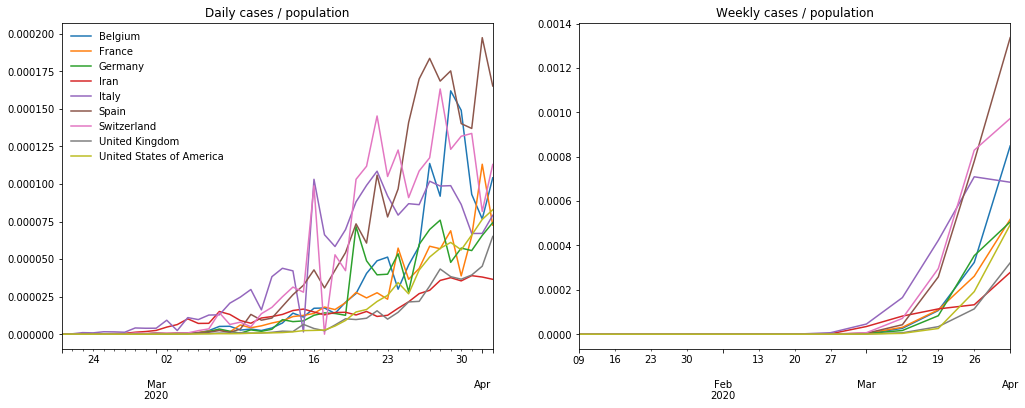

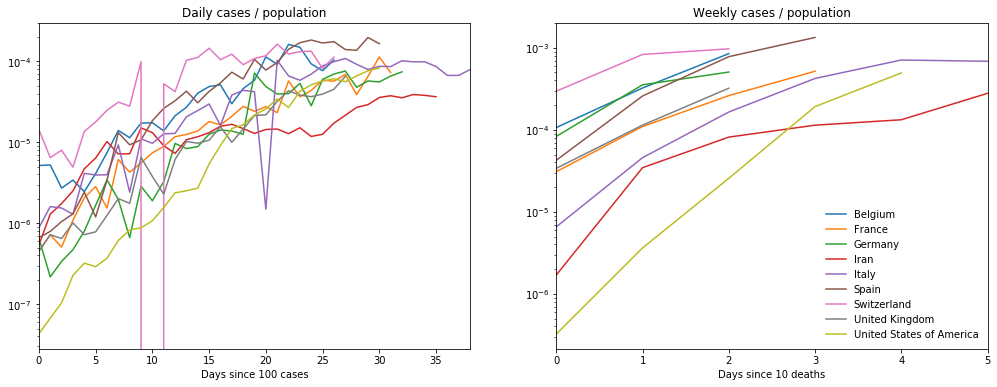

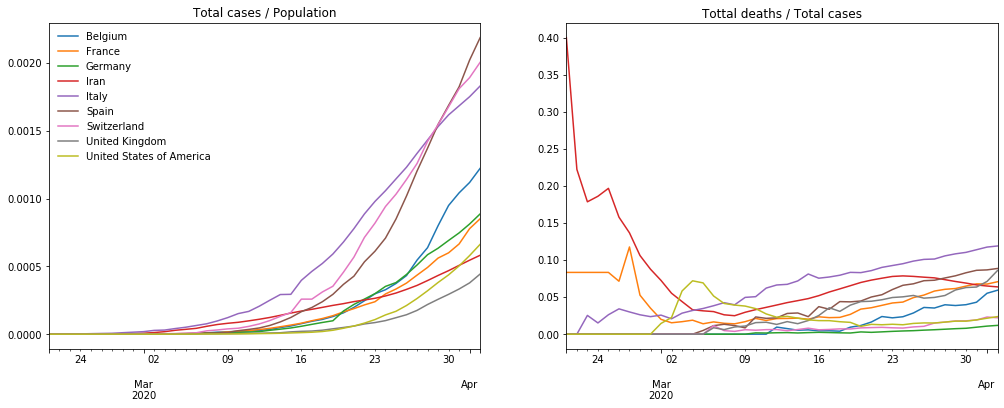

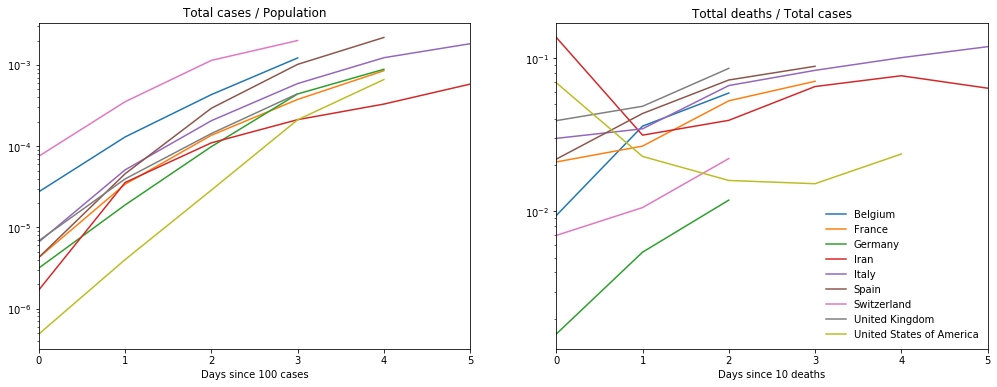

In [44]:
countries_of_interest = ['China', 'France', 'Italy', 'United States of America', 'Spain', 
                         'United Kingdom', 'Belgium', 'Iran', 'Ukraine', 'South Korea']
active_countries = mt.find_active()

plot_spread('incidence', active_countries, days=42)
plot_spread('incidence', active_countries, 'log')
plot_spread('prevalence', active_countries, days=42)
plot_spread('prevalence', active_countries, 'log')

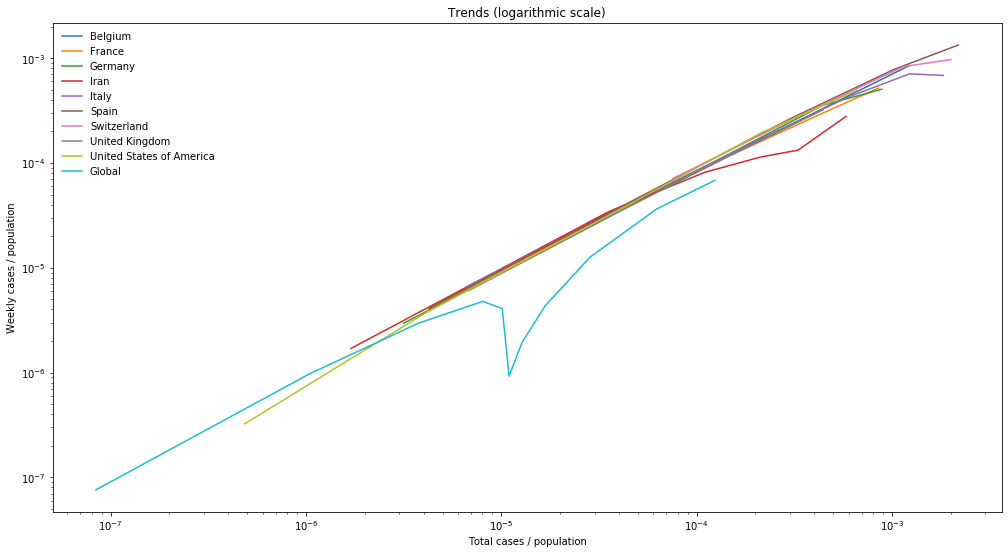

In [50]:
plot_trends(active_countries, subject='impact')